In [1]:
mutable struct Pendulum
    mass::Number
    len::Number
    θ::Number
    ω::Number
end

In [2]:
dt = 0.01
g = 9.82

9.82

In [21]:
function single_pendulum_iteration(pen::Pendulum)

    pen.ω += -dt * pen.len * pen.θ/g
    pen.θ += pen.ω * dt
    
    return pen
end

single_pendulum_iteration (generic function with 1 method)

In [34]:
using Random
using Plots

pen = select_positions()

anim = @animate for i in 1:50
    single_pendulum_iteration(pen) 
    x, y = calculate_positions(pen)
    plot(x, y, 
         xlims=(-10,10), ylims=(-10,10), 
         aspect_ratio=:equal,
         line=(:black, 2),
         marker=(:circle, 6),
         title="Single Pendulum Simulation",
         xlabel="X position", ylabel="Y position")
    # scatter(x, y)
end

Angle 1: (in degrees)

stdin>  180


Mass 1:

stdin>  2


Angular velocity 1:

stdin>  3


Length 1:

stdin>  1


Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_s9eNID", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
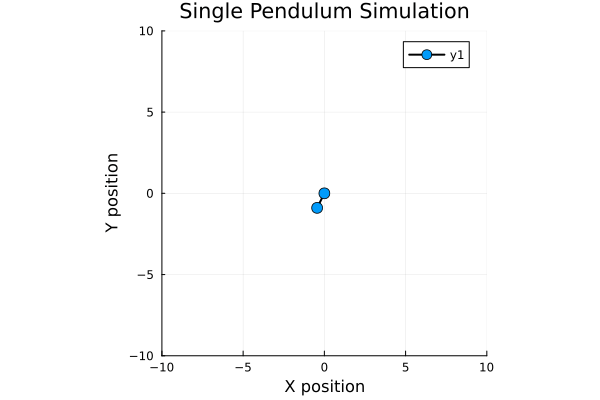

In [35]:
gif(anim, fps=10)

In [3]:
function RK4(h::Float64, pen1::Pendulum, pen2::Pendulum)
    state = [pen1.θ, pen1.ω, pen2.θ, pen2.ω]
    
    k1 = h * derivatives(state, pen1, pen2)
    k2 = h * derivatives(state + k1/2, pen1, pen2)
    k3 = h * derivatives(state + k2/2, pen1, pen2)
    k4 = h * derivatives(state + k3, pen1, pen2)
    
    return state + (k1 + 2k2 + 2k3 + k4) / 6
end

RK4 (generic function with 1 method)

In [10]:
function α(pen1::Pendulum, pen2::Pendulum)
    Δθ = pen1.θ - pen2.θ
    sin_Δθ = sin(Δθ)
    cos_Δθ = cos(Δθ)
    
    dω₁ = (-g * (2*pen1.mass + pen2.mass) * sin(pen1.θ) -
                pen2.mass * g * sin(pen1.θ - 2*pen2.θ) -
                2 * sin_Δθ * pen2.mass * (pen2.ω^2 * pen2.len + pen1.ω^2 * pen1.len * cos_Δθ)/
        pen1.len * (2*pen1.mass + pen2.mass - pen2.mass * cos(2*Δθ)))
    
    dω₂ = ((2 * sin_Δθ * (pen1.ω^2 * pen1.len * (pen1.mass + pen2.mass) +
                g * (pen1.mass + pen2.mass) * cos(pen1.θ) +
                pen2.ω^2 * pen2.len * pen2.mass * cos_Δθ))/
        pen2.len * (2*pen1.mass + pen2.mass - pen2.mass * cos(2*Δθ)))

    return [dω₁,dω₂]
    
end

function derivatives(state, pen1::Pendulum, pen2::Pendulum)
    θ₁, ω₁, θ₂, ω₂ = state

    dθ₁, dθ₂ = ω₁,ω₂
    dω₁, dω₂ = α(pen1, pen2)
    
    return [dθ₁, dω₁, dθ₂, dω₂]
end

derivatives (generic function with 1 method)

In [5]:
function iterate_double_pendulum(dt::Float64, pen1::Pendulum, pen2::Pendulum)
    pen1.θ, pen1.ω, pen2.θ, pen2.ω = RK4(dt, pen1, pen2)
end


iterate_double_pendulum (generic function with 1 method)

In [6]:
function calculate_positions(pen1::Pendulum, pen2::Pendulum)
    x1 = pen1.len * sin(pen1.θ)
    y1 = -pen1.len * cos(pen1.θ)
    x2 = x1 + pen2.len * sin(pen2.θ)
    y2 = y1 - pen2.len * cos(pen2.θ)
    return [0, x1, x2], [0, y1, y2]
end

function calculate_positions(pen1::Pendulum)
    x1 = pen1.len * sin(pen1.θ)
    y1 = -pen1.len * cos(pen1.θ)
    return [0, x1], [0, y1]
end

calculate_positions (generic function with 2 methods)

In [7]:
function select_positions() 
    print("Angle 1: (in degrees)")
    v1 = parse(Float64, readline()) * pi / 180
    print("Mass 1:")
    m1 = parse(Float64, readline())
    print("Angular velocity 1:")
    a1 = parse(Float64, readline())
    print("Length 1:")
    l1 = parse(Float64, readline())

    return Pendulum(m1,l1,v1,a1) 
end

select_positions (generic function with 1 method)

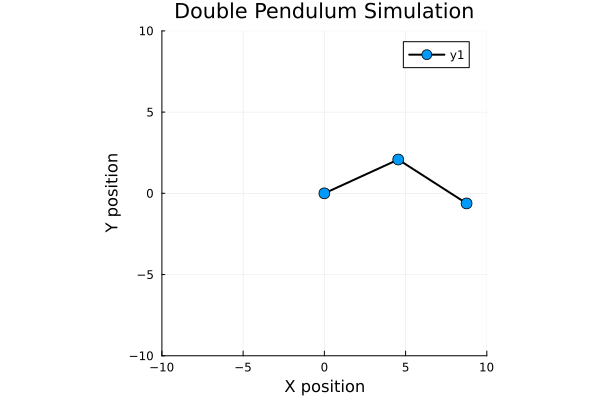

In [12]:
#pen1, pen2 = select_positions(), select_positions()

pen1 = Pendulum(0.01, 5, 2, 0) 
pen2 = Pendulum(0.01, 5, 1, 1)

x, y = calculate_positions(pen1, pen2)

plot(x, y, 
         xlims=(-10,10), ylims=(-10,10), 
         aspect_ratio=:equal,
         line=(:black, 2),
         marker=(:circle, 6),
         title="Double Pendulum Simulation",
         xlabel="X position", ylabel="Y position")

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/double_pendulum.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/double_pendulum.gif")
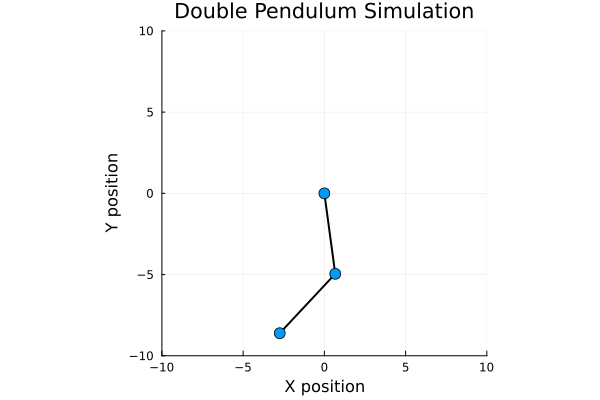

In [21]:
dt = 0.1
times = [0.]
θ₁s = [pen1.θ]
θ₂s = [pen1.θ]

anim = @animate for i in 1:500 
    iterate_double_pendulum(dt, pen1, pen2)
    x, y = calculate_positions(pen1, pen2)
    
    plot(x, y, 
         xlims=(-10,10), ylims=(-10,10), 
         aspect_ratio=:equal,
         line=(:black, 2),
         marker=(:circle, 6),
         legend = false,
         title="Double Pendulum Simulation",
         xlabel="X position", ylabel="Y position")
end

gif(anim, "double_pendulum.gif", fps = 30) 